In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from dash import Dash, html, dcc, Input, Output
import dash_bootstrap_components as dbc

In [34]:
# Opening Excel file
data = pd.ExcelFile("Confectionary_4564.xlsx")

In [35]:
# Checking available sheets
data.sheet_names

['Sheet1']

In [36]:
# Loading 'Sheet1' into a DataFrame
df = data.parse('Sheet1')

In [37]:
# Creating a backup of the original DataFrame
df_backup = df.copy()

<h1>Data Understanding

In [6]:
# Checking the structure and data types of the dataset (column data types and non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1001 non-null   datetime64[ns]
 1   Country(UK)    1001 non-null   object        
 2   Confectionary  1001 non-null   object        
 3   Units Sold     996 non-null    float64       
 4   Cost(£)        992 non-null    float64       
 5   Profit(£)      998 non-null    float64       
 6   Revenue(£)     1001 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 54.9+ KB


In [7]:
#Showing the first few rows of the dataset (sample records to understand dataset content)
df.head()

,Date,Country(UK),Confectionary,Units Sold,Cost(£),Profit(£),Revenue(£)
0,2002-11-11,England,Biscuit,1118.0,2459.6,3130.4,749954.4
1,2002-07-05,England,Biscuit,708.0,1557.6,1982.4,300758.4
2,2001-10-31,England,Biscuit,1269.0,2791.8,3553.2,966216.6
3,2004-09-13,England,Biscuit,1631.0,3588.2,4566.8,1596096.6
4,2004-03-10,England,Biscuit,2240.0,4928.0,6272.0,3010560.0


In [8]:
# Getting statistical summary of the DataSet ((mean, std, min, max, etc.))
df.describe()

,Date,Units Sold,Cost(£),Profit(£),Revenue(£)
count,1001,996.000000,992.000000,998.000000,1.001000e+03
mean,2002-11-19 10:54:32.727272832,1633.360442,2820.190877,4012.076052,2.519449e+06
min,2000-01-02 00:00:00,200.000000,40.000000,160.000000,-2.196226e+07
25%,2001-05-12 00:00:00,923.000000,1204.000000,1872.400000,5.762400e+05
50%,2002-11-10 00:00:00,1530.500000,2456.800000,3459.000000,1.627208e+06
75%,2004-04-25 00:00:00,2300.000000,3977.625000,5445.000000,3.551112e+06
max,2005-12-28 00:00:00,4493.000000,10994.500000,13479.000000,2.018705e+07
std,NaN,876.356045,2073.969135,2648.166312,2.941639e+06


In [9]:
# Finding the number of unique data for each column
print ("\n--- << The number of unique data for each column >> ---\n")
print(df.nunique())

# Showing all unique types of country and confectionary columns
print ("\n--- << all unique types of Country >> ---\n")
print(df_backup['Country(UK)'].unique())
print ("\n--- << all unique types of confectionary >> ---\n")
print(df_backup['Confectionary'].unique())



--- << The number of unique data for each column >> ---

Date             802
Country(UK)        5
Confectionary      8
Units Sold       391
Cost(£)          513
Profit(£)        511
Revenue(£)       499
dtype: int64

--- << all unique types of Country >> ---

['England' 'Scotland' 'Wales' 'N. Ireland' 'Jersey']

--- << all unique types of confectionary >> ---

['Biscuit' 'Biscuit Nut' 'Choclate Chunk' 'Caramel nut' 'Caramel' 'Plain'
 'Chocolate Chunk' 'Caramel Nut']


<h1>Data preprocessing

In [10]:
# Fixing spelling and capitalization in the "Confectionary" column and showing unique values
df['Confectionary'] = df['Confectionary'].replace({
    'Caramel nut': 'Caramel Nut',
    'Choclate Chunk': 'Chocolate Chunk'})
print(df['Confectionary'].unique())

['Biscuit' 'Biscuit Nut' 'Chocolate Chunk' 'Caramel Nut' 'Caramel' 'Plain']


In [11]:
# Detecting the number of missing values in each column
print ("----- << The number of missing values in each column >> ----")
print(df.isnull().sum())
print("The total number of missing values ----> ", df.isnull().sum().sum())

# Checking duplicate 
duplicates = df.duplicated()
print("\nThe number of duplicate rows ----> ", duplicates.sum())

# Detecting zero or negative values in each column
print ("\n--- << The number of zero or negative values in each column >> ---")
zero_or_negative = (df.select_dtypes(include=['float64', 'int64']) <= 0).sum()
print(zero_or_negative)

----- << The number of missing values in each column >> ----
Date             0
Country(UK)      0
Confectionary    0
Units Sold       5
Cost(£)          9
Profit(£)        3
Revenue(£)       0
dtype: int64
The total number of missing values ---->  17

The number of duplicate rows ---->  0

--- << The number of zero or negative values in each column >> ---
Units Sold    0
Cost(£)       0
Profit(£)     0
Revenue(£)    8
dtype: int64


In [12]:
# Dropping rows with missing values (NaN)
df.dropna(inplace=True)

In [13]:
# Checking statistical summary BEFORE dropping null values
df_backup.describe()

,Date,Units Sold,Cost(£),Profit(£),Revenue(£)
count,1001,996.000000,992.000000,998.000000,1.001000e+03
mean,2002-11-19 10:54:32.727272832,1633.360442,2820.190877,4012.076052,2.519449e+06
min,2000-01-02 00:00:00,200.000000,40.000000,160.000000,-2.196226e+07
25%,2001-05-12 00:00:00,923.000000,1204.000000,1872.400000,5.762400e+05
50%,2002-11-10 00:00:00,1530.500000,2456.800000,3459.000000,1.627208e+06
75%,2004-04-25 00:00:00,2300.000000,3977.625000,5445.000000,3.551112e+06
max,2005-12-28 00:00:00,4493.000000,10994.500000,13479.000000,2.018705e+07
std,NaN,876.356045,2073.969135,2648.166312,2.941639e+06


In [14]:
# Checking statistical summary AFTER dropping null values
df.describe()

,Date,Units Sold,Cost(£),Profit(£),Revenue(£)
count,984,984.000000,984.000000,984.000000,9.840000e+02
mean,2002-11-15 19:14:38.048780544,1633.598577,2818.788720,4025.956199,2.552826e+06
min,2000-01-02 00:00:00,200.000000,40.000000,160.000000,2.400000e+04
25%,2001-05-10 06:00:00,923.000000,1211.800000,1873.200000,6.193690e+05
50%,2002-10-28 00:00:00,1530.500000,2459.600000,3467.400000,1.630818e+06
75%,2004-04-22 00:00:00,2300.000000,3977.625000,5452.500000,3.549870e+06
max,2005-12-28 00:00:00,4493.000000,10994.500000,13479.000000,2.018705e+07
std,NaN,875.539978,2066.153787,2651.751773,2.822196e+06


<h1>Detecting and Handeling Outliers

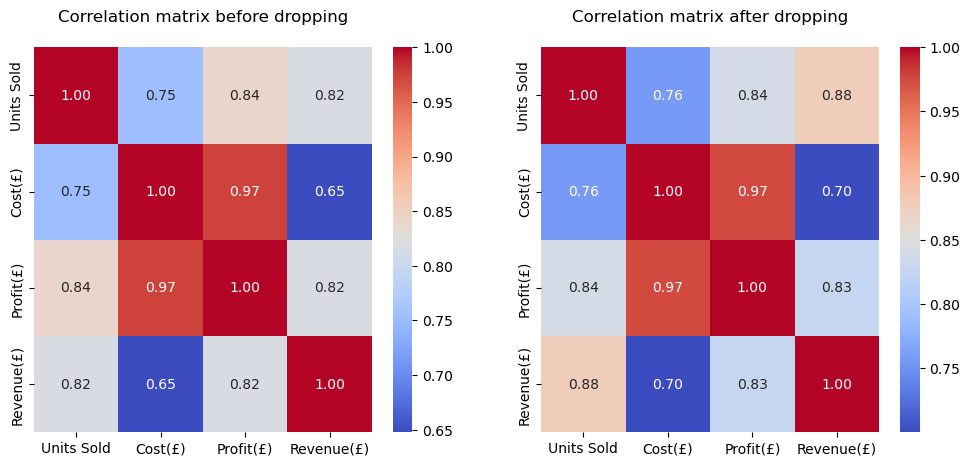

In [15]:
# Checking correlation before and after dropping
corr_before = df_backup[['Units Sold', 'Cost(£)', 'Profit(£)', 'Revenue(£)']].corr()
corr_after = df[['Units Sold', 'Cost(£)', 'Profit(£)', 'Revenue(£)']].corr()

# Ploting two matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Correlation matrix before dropping
sns.heatmap(corr_before, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation matrix before dropping\n')

# Correlation matrix after dropping
sns.heatmap(corr_after, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation matrix after dropping\n')

plt.show()

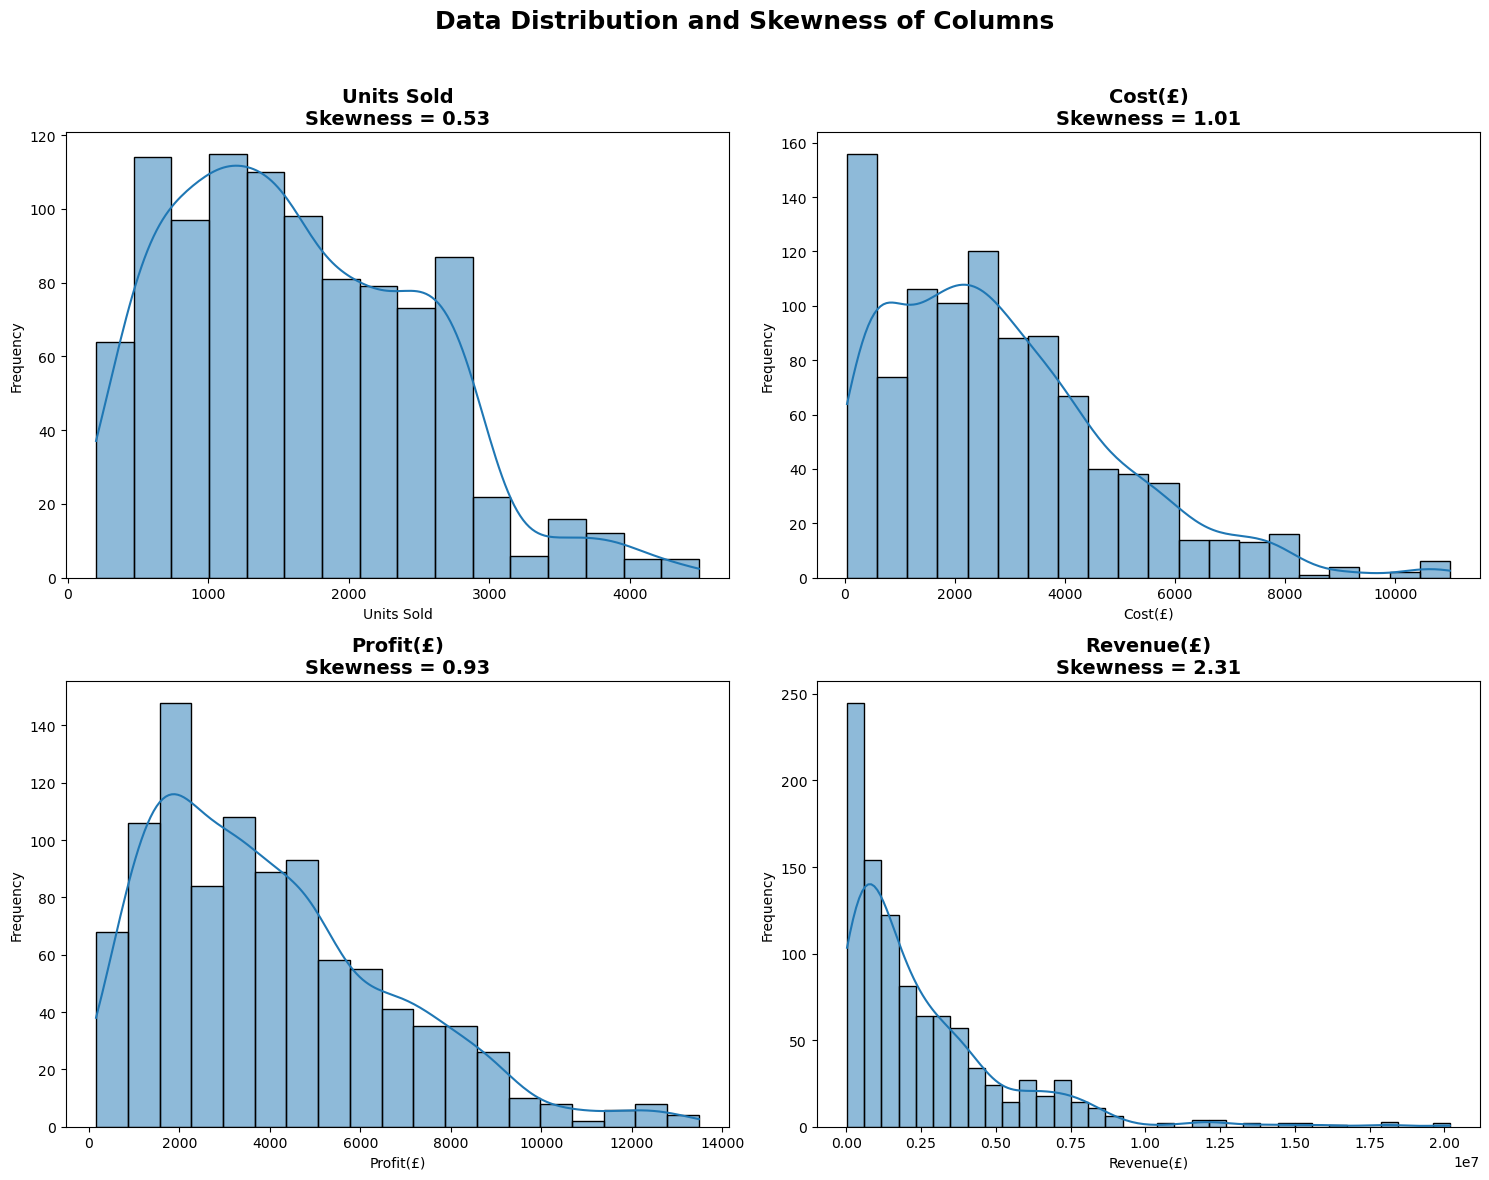

In [16]:
# EDA  Visual graphics (Distribution and Skewness)
columns = ['Units Sold', 'Cost(£)', 'Profit(£)', 'Revenue(£)']
# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

for ax, col in zip(axs.flatten(), columns):
    sns.histplot(df[col], kde=True, ax=ax)
    skew_val = df[col].skew() # Calculatting skewness for the current column
    ax.set_title(f'{col}\nSkewness = {skew_val:.2f}', fontsize=14, fontweight='bold')  # Setting title of subplot
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

fig.suptitle('Data Distribution and Skewness of Columns', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


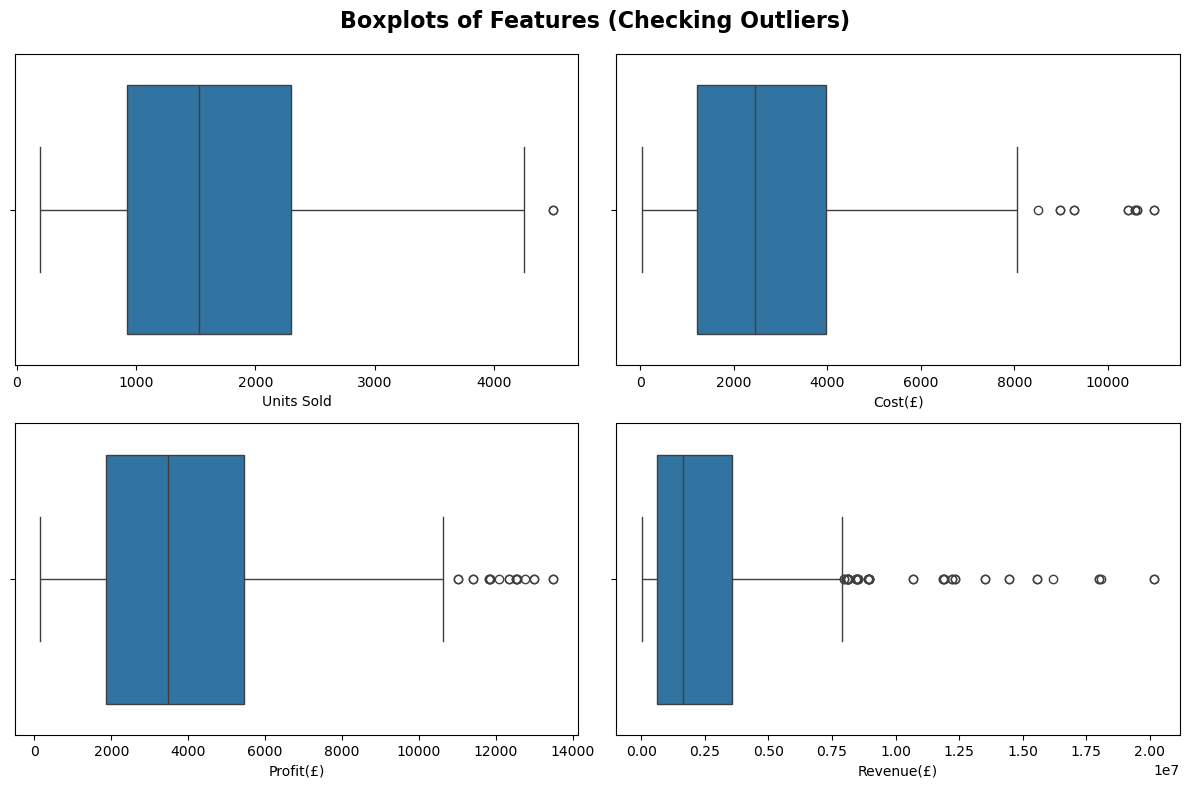

In [17]:
#Checking outliers for all columns
num_cols = ['Units Sold', 'Cost(£)', 'Profit(£)', 'Revenue(£)']
# Create grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
# Drawing boxplots
sns.boxplot(x=df[num_cols[0]], ax=axs[0, 0])
sns.boxplot(x=df[num_cols[1]], ax=axs[0, 1])
sns.boxplot(x=df[num_cols[2]], ax=axs[1, 0])
sns.boxplot(x=df[num_cols[3]], ax=axs[1, 1])

fig.suptitle('Boxplots of Features (Checking Outliers)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

In [18]:
# Removing Outliers using IQR 

# Create a copy of the original DataFrame to avoid modifying it directly
df_iqr = df.copy()

for col in num_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1   
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Display the bounds (optional, for inspection)
    print(f"{col}: Lower = {lower_bound:.2f}, Upper = {upper_bound:.2f}")
    
    # Filter the data to keep only rows within the IQR range
    df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]

# Compare the size of the dataset before and after removing outliers
print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(df_iqr)}")
print(f"Total outliers removed: {len(df) - len(df_iqr)}")

#check skewness again after removing outliers
print("\nSkewness after outlier removal:")
print(df_iqr[num_cols].skew())

Units Sold: Lower = -1142.50, Upper = 4365.50
Cost(£): Lower = -2913.00, Upper = 8072.60
Profit(£): Lower = -3408.22, Upper = 10646.77
Revenue(£): Lower = -3737646.00, Upper = 7766050.00
Original dataset size: 984
Dataset size after removing outliers: 927
Total outliers removed: 57

Skewness after outlier removal:
Units Sold    0.274756
Cost(£)       0.756577
Profit(£)     0.614184
Revenue(£)    1.096875
dtype: float64


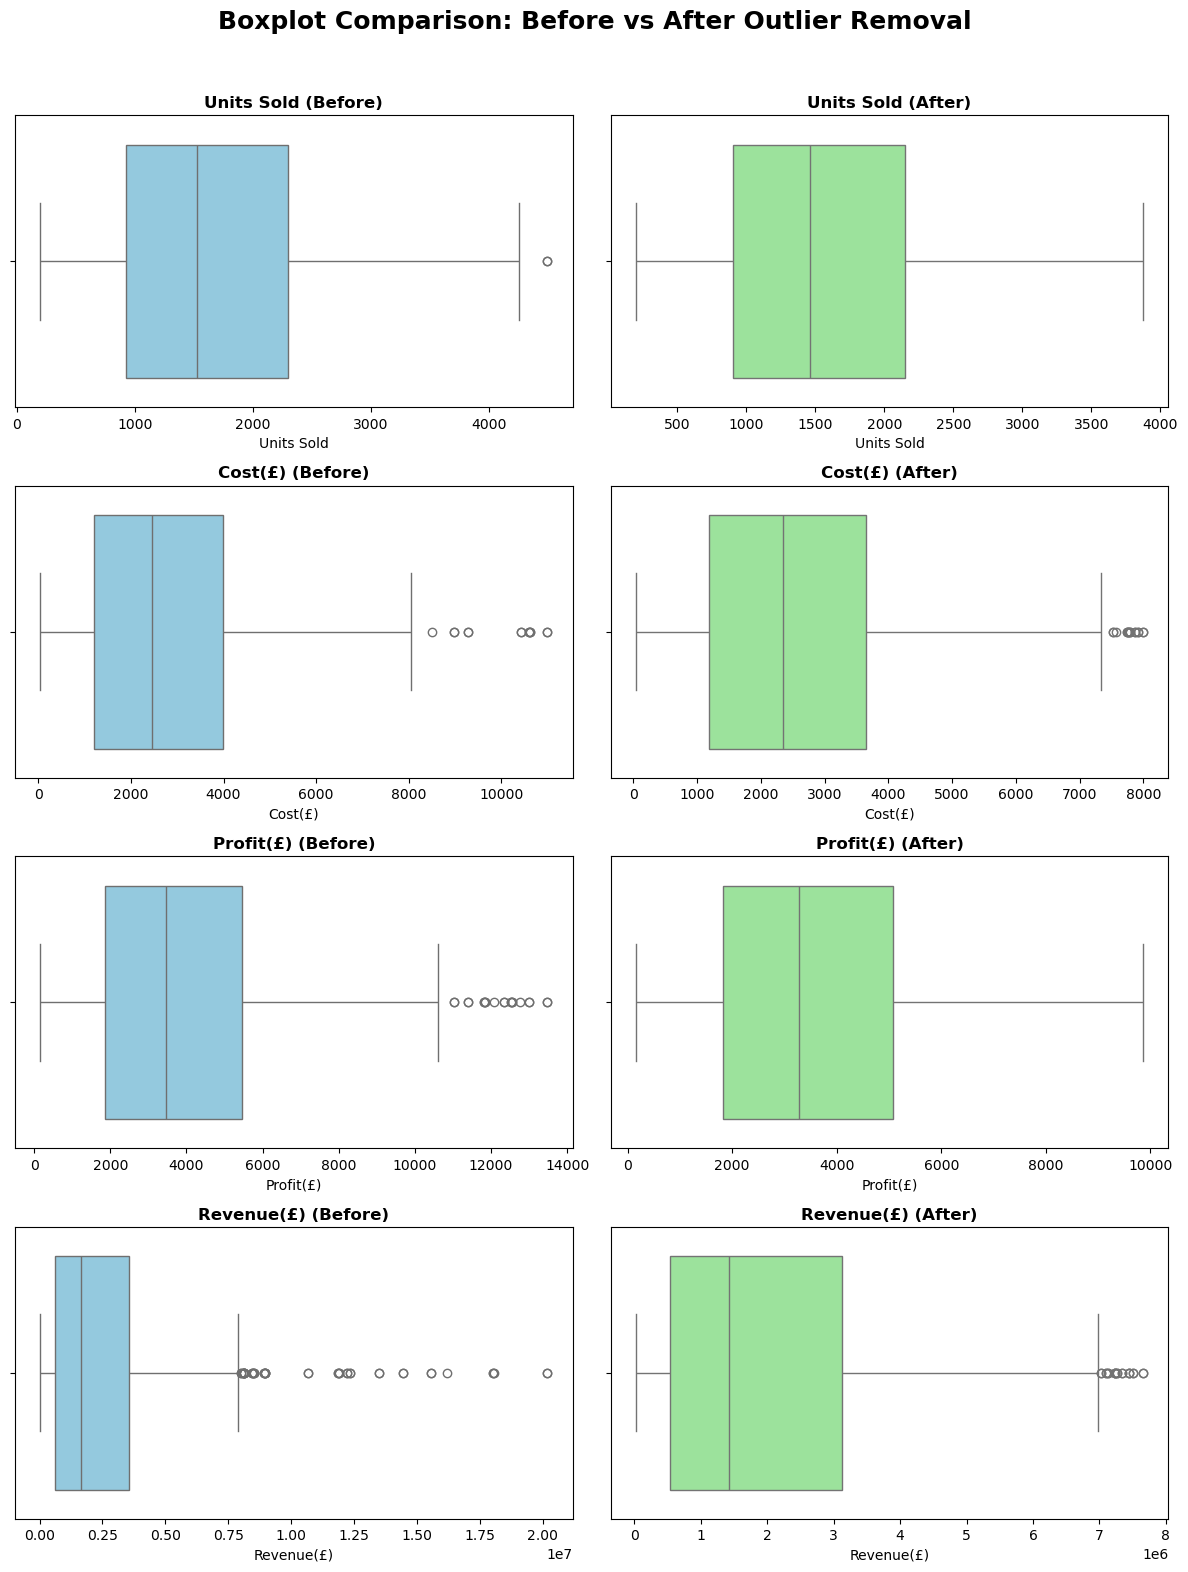

In [19]:
# Boxplot Comparison: Before vs After Outlier Removal (IQR)

# Set up the plotting area
fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 16))
fig.suptitle("Boxplot Comparison: Before vs After Outlier Removal", 
             fontsize=18, fontweight='bold')

# Plot boxplots for each column (before and after)
for i, col in enumerate(num_cols):
    # ---- Before IQR Cleaning ----
    sns.boxplot(x=df[col], ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"{col} (Before)", fontsize=12, fontweight='bold')
    axes[i, 0].set_xlabel(col)

    # ---- After IQR Cleaning ----
    sns.boxplot(x=df_iqr[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f"{col} (After)", fontsize=12, fontweight='bold')
    axes[i, 1].set_xlabel(col)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [20]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           927 non-null    datetime64[ns]
 1   Country(UK)    927 non-null    object        
 2   Confectionary  927 non-null    object        
 3   Units Sold     927 non-null    float64       
 4   Cost(£)        927 non-null    float64       
 5   Profit(£)      927 non-null    float64       
 6   Revenue(£)     927 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 57.9+ KB


<h1> Data Visualization

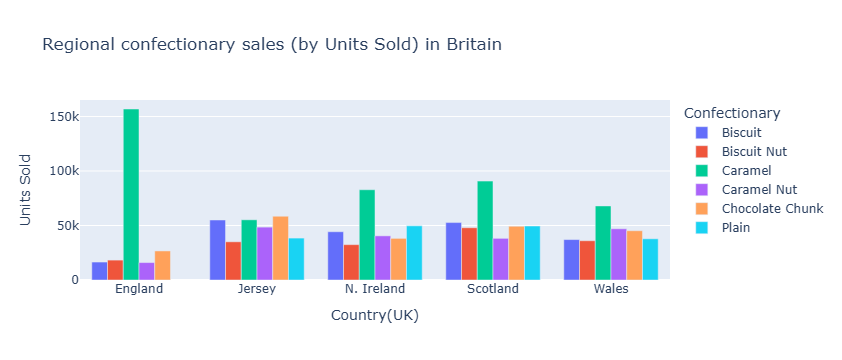

In [32]:
# Regional confectionary sales

# Calculate total units sold by country and confectionary type
regional_sale=df_iqr.groupby(['Country(UK)', 'Confectionary']) ['Units Sold'].sum().reset_index()
# Create a grouped bar chart showing total units sold by confectionary type and region
fig=px.bar(regional_sale, x='Country(UK)', y='Units Sold', color='Confectionary', 
           title='Regional confectionary sales (by Units Sold) in Britain')
fig.update_layout(barmode='group') 
fig.show()

In [22]:
# Computing profit margin percentage
df_iqr['Profit_margin_percentage'] = (df_iqr['Profit(£)'] / df_iqr['Revenue(£)']) * 100
df_iqr['Profit_margin_percentage'] = df_iqr['Profit_margin_percentage'].replace([np.inf, -np.inf], np.nan)

#Grouping by Country and Confectionary
country_confectionary = df_iqr.groupby(['Country(UK)', 'Confectionary']).agg(
    mean_margin=('Profit_margin_percentage', 'mean'),
    profit_sum=('Profit(£)', 'sum'),
    revenue_sum=('Revenue(£)', 'sum'),
    records=('Date', 'count')
).reset_index()

#Identifying confectionary with largest/smallest margin per region 
max_amount = country_confectionary.groupby('Country(UK)')['mean_margin'].idxmax()
min_amount = country_confectionary.groupby('Country(UK)')['mean_margin'].idxmin()

max_margin_per_region = country_confectionary.loc[max_amount].reset_index(drop=True)
min_margin_per_region = country_confectionary.loc[min_amount].reset_index(drop=True)

print("\n----- <<< Confectionary with HIGHEST Profit Margin by Region >>> -----\n")
print(max_margin_per_region)
print("\n----- <<< Confectionary with LOWEST Profit Margin by Region >>> -----\n")
print(min_margin_per_region)


----- <<< Confectionary with HIGHEST Profit Margin by Region >>> -----

  Country(UK) Confectionary  mean_margin  profit_sum  revenue_sum  records
0     England   Caramel Nut     0.675867    51902.50   13609071.0       12
1      Jersey   Caramel Nut     0.622148   157673.75   47813594.5       33
2  N. Ireland   Caramel Nut     0.872771   131605.50   33962569.0       34
3    Scotland   Caramel Nut     0.563734   124215.00   31757031.0       27
4       Wales   Caramel Nut     0.721691   152691.50   42565943.0       34

----- <<< Confectionary with LOWEST Profit Margin by Region >>> -----

  Country(UK) Confectionary  mean_margin  profit_sum  revenue_sum  records
0     England   Biscuit Nut     0.190642     45640.0   31737748.0       12
1      Jersey         Plain     0.095572     30761.6   47421031.2       22
2  N. Ireland         Plain     0.107402     39731.2   59354299.2       30
3    Scotland         Plain     0.112072     39612.8   55347806.4       30
4       Wales         Plain   

In [23]:
# Highest and Lowest Profit Margin Confectionary per Country (First visualization)

# Combine Max and Min with a 'Type' column
combined = pd.concat([max_margin_per_region.assign(Type='HIGHEST Profit Margin by Region'),
                      min_margin_per_region.assign(Type='LOWEST Profit Margin by Region')], ignore_index=True)

# Create interactive grouped bar chart
fig = px.bar(combined, x='Country(UK)', y='mean_margin', color='Confectionary', barmode='group', facet_col='Type', 
             text='mean_margin', title='Highest and Lowest Profit Margin Confectionary per Country')

# Format text and layout
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(yaxis_title='Mean Profit Margin (%)', xaxis_title='Country',
                  uniformtext_minsize=10, uniformtext_mode='hide', legend_title_text='Confectionary',
                  title_font=dict(size=18, family='Arial', color='black'))
fig.show()

In [24]:
# Peak month per region (by Revenue)
df_iqr['Month'] = df_iqr['Date'].dt.to_period('M')
regional_month = df_iqr.groupby(['Country(UK)', 'Month'])['Revenue(£)'].sum().reset_index()
idx = regional_month.groupby('Country(UK)')['Revenue(£)'].idxmax()
peaks = regional_month.loc[idx].sort_values('Country(UK)')

# label for displaying
peaks['Month'] = peaks['Month'].astype(str)

# Simple bar to highlight peak size per region
fig = px.bar(peaks, x='Country(UK)', y='Revenue(£)', text='Month',
             title='Peak Month by Region (Revenue)')
fig.update_traces(textposition='inside')
fig.show()


In [25]:
# Region peaks in sales over time


# Aggregate total units sold by region
regional_sales = df_iqr.groupby('Country(UK)')['Units Sold'].sum().reset_index()
# Sort the regions by Units Sold for better visual order (ascending)
regional_sales = regional_sales.sort_values('Units Sold', ascending=True)

#  Prepare a color gradient for the bars
min_val = regional_sales['Units Sold'].min()
max_val = regional_sales['Units Sold'].max()
# Using colormap 
cmap = plt.get_cmap('RdYlGn')
# Build horizontal bar chart with gradient colors
fig = go.Figure()

# Loop through each row to assign a color based on normalized Units Sold
for i, row in regional_sales.iterrows():
    # Normalize value between 0 and 1
    norm = (row['Units Sold'] - min_val) / (max_val - min_val)
    rgba = cmap(norm)  # Get RGBA color from colormap
    hex_color = mcolors.to_hex(rgba)  # Convert RGBA to hex for Plotly
    # Add a horizontal bar for this country
    fig.add_trace(go.Bar(x=[row['Units Sold']], y=[row['Country(UK)']], orientation='h', name=row['Country(UK)'],    
        marker_color=hex_color, text=[row['Units Sold']]))

# Customize layout
fig.update_layout(title='Peak Sales by Region (Units Sold)', xaxis_title='Total Units Sold', yaxis_title='Country', 
                  width=1000, height=600,legend_title='Country',template='plotly_white')
fig.show()


In [26]:
# Average Profit by Region

fig_bar = px.bar(df_iqr, x='Country(UK)', y='Profit(£)', color='Country(UK)', title='Average Profit by Region',  
    labels={'Profit(£)': 'Average Profit (£)', 'Country(UK)': 'Country(UK)'}, barmode='group')

# Adjust bar opacity for better visual appeal
fig_bar.update_traces(opacity=0.8)

# Display the bar chart
fig_bar.show()

# Profit Distribution by Region
fig_box = px.box(df_iqr, x='Country(UK)', y='Profit(£)', color='Country(UK)', 
                 title='Profit Distribution by Region', points='all')

# Display the box plot
fig_box.show()


In [28]:
# Sales over time (Units Sold)

# Prepare the data
df_iqr['Year'] = df_iqr['Date'].dt.year  # Extract year from Date column

# Group by Date, Country, and Year to get total revenue per day per region
sales = df_iqr.groupby(['Date', 'Country(UK)', 'Year'])['Units Sold'].sum().reset_index()

# Get sorted list of regions and years
regions = sorted(sales['Country(UK)'].unique())
years = sorted(sales['Year'].unique())

# Create traces for each region-year combination
fig = go.Figure()

for region in regions:
    for year in years:
        data = sales[(sales['Country(UK)'] == region) & (sales['Year'] == year)]
        fig.add_trace(go.Scatter(x=data['Date'], y=data['Units Sold'], mode='lines+markers', name=f'{region} - {year}'))

# Create dropdown menu for selecting region
country_buttons = []

# showing all countries
visible_all = [True] * len(fig.data)
country_buttons.append(
    dict(label="All", method="update", args=[{'visible': visible_all}, {'title': "Sales Over Time (Units Sold)"}]))

# Options for individual countries
for r_i, region in enumerate(regions):
    visible = [False] * len(fig.data)
    for y_i in range(len(years)):
        visible[r_i * len(years) + y_i] = True
    country_buttons.append(dict(label=region, method='update', args=[{'visible': visible}, {'title': f"Sales Over Time (Units Sold)"}]))

# Create checkbox buttons for years (multi-select)
year_buttons = []
for y_i, year in enumerate(years):
    year_buttons.append(dict(label=str(year), method="update", args=[{"visible": [(trace.name.endswith(str(year))) for trace in fig.data]}], 
                             args2=[{"visible": "toggle"}]))

# Update layout with dropdown and checkboxes
fig.update_layout(
    updatemenus=[
        # Dropdown for country
        dict(buttons=country_buttons, direction="down", x=0.0, xanchor="left", y=1.2, yanchor="top",
            showactive=True, bgcolor="white", bordercolor="gray", borderwidth=1, font=dict(size=12)),
        # Checkbox-style buttons for years
        dict(type="buttons", buttons=year_buttons, direction="right", x=1.0, xanchor="right", y=1.15, yanchor="top",
            showactive=True, bgcolor="white", bordercolor="gray", borderwidth=1, font=dict(size=12))],
    title=f"Sales Over Time (Units Sold)",
    xaxis_title="Date",
    yaxis_title="Revenue (£)",
    hovermode="x unified",
    template="plotly_white")
                             
# Showing chart
fig.show()


In [29]:
# Product Profitability — Stacked Bar Chart by Country

# Group the data by (Confectionary) and (Country) and sum the total profit for each combination.
profit_product_country = (df_iqr.groupby(['Confectionary', 'Country(UK)'])['Profit(£)'].sum().reset_index())

# Format profit values to one decimal place for cleaner labels on bars
profit_product_country['Profit_text'] = profit_product_country['Profit(£)'].map(lambda x: f"{x:.1f}")

# Create stacked bar chart
fig = px.bar(profit_product_country, x='Confectionary', y='Profit(£)', color='Country(UK)',            
    title='Product Profitability by Country', labels={'Profit(£)': 'Profit (£)', 'Confectionary': 'Product'},
    text='Profit_text')

# better visualization
fig.update_traces(textposition='inside', textfont=dict(size=11),         
    hovertemplate='<b>%{x}</b><br>Country: %{color}<br>Profit: £%{y:,.1f}<extra></extra>')

fig.update_layout(barmode='stack', xaxis_title='Product', yaxis_title='Profit (£)', template='plotly_white',         
    width=1000, height=800, legend_title='Country')

fig.show()


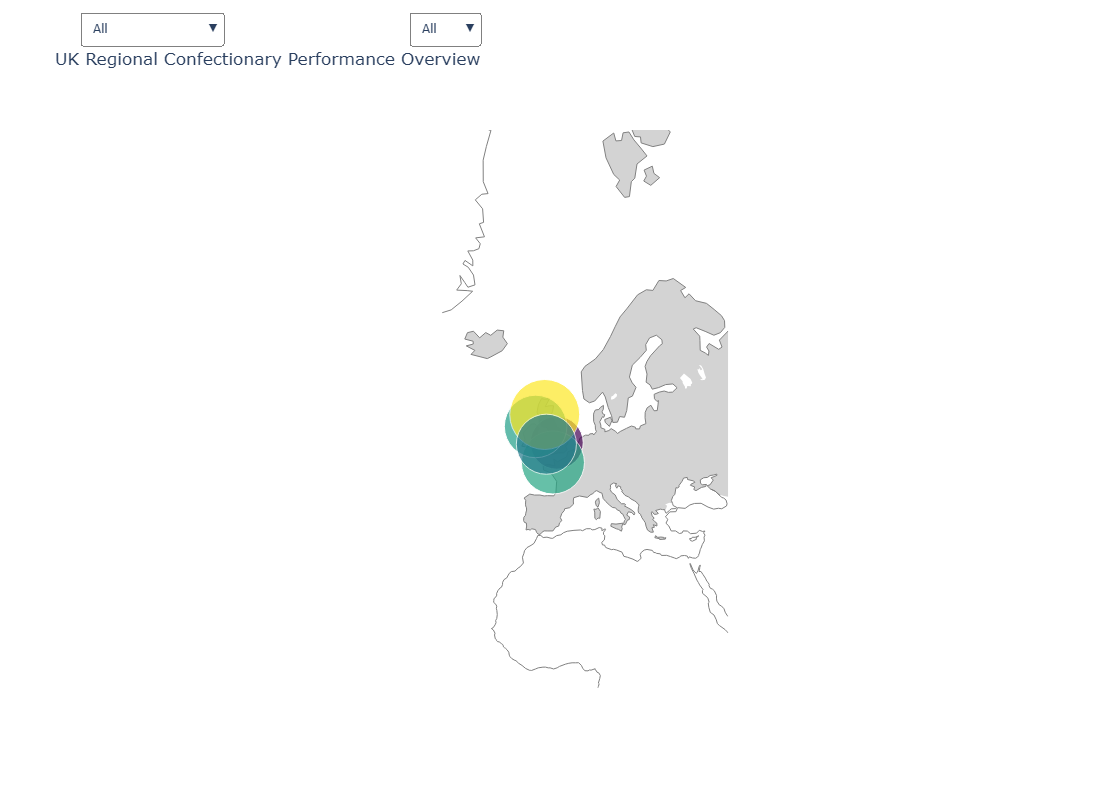

In [45]:
# UK Regional Confectionary Performance Overview

# Data Preparation
# Extract year from the date column for time-based grouping
df_iqr['Year'] = df_iqr['Date'].dt.year

# Aggregate key metrics per Country, Year, and Confectionary (product)
summary = (
    df_iqr.groupby(['Country(UK)', 'Year', 'Confectionary'])
    .agg({'Profit(£)': 'sum','Revenue(£)': 'sum','Cost(£)': 'sum','Units Sold': 'sum'}).reset_index())

# Add approximate latitude/longitude for UK regions
uk_coords = {'England': {'lat': 52.3555, 'lon': -1.1743},'Scotland': {'lat': 56.4907, 'lon': -4.2026},
    'Wales': {'lat': 52.1307, 'lon': -3.7837},'N. Ireland': {'lat': 54.7877, 'lon': -6.4923},
    'Jersey': {'lat': 49.2138, 'lon': -2.1358}}

# Convert coordinate dictionary into a DataFrame
coords_df = pd.DataFrame([
    {'Country(UK)': k, 'lat': v['lat'], 'lon': v['lon']}
    for k, v in uk_coords.items()])

# Merge geographic coordinates into the summary data
summary = summary.merge(coords_df, on='Country(UK)', how='left')

# Dropdown control values
years = sorted(summary['Year'].unique())
years.insert(0, 'All')

products = sorted(summary['Confectionary'].unique())
products.insert(0, 'All')

# Helper function to filter data dynamically
def get_filtered_data(selected_year, selected_product):
    """Return aggregated dataset filtered by year and/or product."""
    df = summary.copy()
    if selected_year != 'All':
        df = df[df['Year'] == selected_year]
    if selected_product != 'All':
        df = df[df['Confectionary'] == selected_product]

    return (df.groupby(['Country(UK)', 'lat', 'lon']).agg({'Profit(£)': 'sum','Revenue(£)': 'sum',
            'Cost(£)': 'sum','Units Sold': 'sum'}).reset_index())

# Initial (default) view
filtered = get_filtered_data('All', 'All')

# Build the base map
fig = go.Figure()

# Add scatter points representing each region
fig.add_trace(go.Scattergeo(lon=filtered['lon'], lat=filtered['lat'],
    text=filtered.apply(lambda r:
        f"<b>{r['Country(UK)']}</b><br>"
        f"Profit: £{r['Profit(£)']:.1f}<br>"
        f"Revenue: £{r['Revenue(£)']:.1f}<br>"
        f"Cost: £{r['Cost(£)']:.1f}<br>"
        f"Units Sold: {r['Units Sold']:.0f}", axis=1),
    marker=dict(size=filtered['Profit(£)'] / filtered['Profit(£)'].max() * 60 + 10, color=filtered['Profit(£)'],
        colorscale='Viridis',), hoverinfo='text'))

# Configure map appearance
fig.update_geos(scope='europe', center=dict(lat=55, lon=-3), projection_type='mercator', showcountries=False, 
                showcoastlines=True, coastlinecolor='gray', showland=True, landcolor='lightgray')

#Layout settings
fig.update_layout(title="UK Regional Confectionary Performance Overview", template='plotly_white', width=900,
    height=800, geo=dict(bgcolor='rgba(0,0,0,0)'))

# Dropdown Menus for Year and Product
year_buttons = []
for year in years:
    df_year = get_filtered_data(year, 'All')
    year_buttons.append(dict(label=str(year),method='update',
        args=[{'marker': [dict(size=df_year['Profit(£)'] / df_year['Profit(£)'].max() * 60 + 10, color=df_year['Profit(£)'])],
            'lon': [df_year['lon']],'lat': [df_year['lat']],
            'text': [df_year.apply(lambda r:
                f"<b>{r['Country(UK)']}</b><br>"
                f"Profit: £{r['Profit(£)']:.1f}<br>"
                f"Revenue: £{r['Revenue(£)']:.1f}<br>"
                f"Cost: £{r['Cost(£)']:.1f}<br>"
                f"Units Sold: {r['Units Sold']:.0f}", axis=1)]
        }, {'title': f"UK Regional Confectionary Performance Overview"}]))

product_buttons = []
for prod in products:
    df_prod = get_filtered_data('All', prod)
    product_buttons.append(dict(label=prod, method='update',
        args=[{'marker': [dict(size=df_prod['Profit(£)'] / df_prod['Profit(£)'].max() * 60 + 10, color=df_prod['Profit(£)'])],
            'lon': [df_prod['lon']],'lat': [df_prod['lat']],
            'text': [df_prod.apply(lambda r:
                f"<b>{r['Country(UK)']}</b><br>"
                f"Profit: £{r['Profit(£)']:.1f}<br>"
                f"Revenue: £{r['Revenue(£)']:.1f}<br>"
                f"Cost: £{r['Cost(£)']:.1f}<br>"
                f"Units Sold: {r['Units Sold']:.0f}", axis=1)]
        }, {'title': f"UK Regional Confectionary Performance Overview"}]))

# Add both dropdowns to the layout
fig.update_layout(updatemenus=[dict(buttons=product_buttons, direction="down", x=0.0, xanchor="left",
            y=1.2, yanchor="top", bgcolor="white", bordercolor="gray", font=dict(size=12)),
        dict(buttons=year_buttons, direction="down", x=0.35, xanchor="left", y=1.2, yanchor="top", bgcolor="white",
            bordercolor="gray", font=dict(size=12))])

#  Display
fig.show()


<h1>  Dashboard

In [46]:
# British Confectionary Dashboard

# data preparation
df = df_iqr.copy() 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%b')
df['Margin(%)'] = (df['Profit(£)'] / df['Revenue(£)']) * 100

# Dash App
app = Dash(__name__, external_stylesheets=[dbc.themes.FLATLY])  # Clean bright theme

# Dropdowns and Checklists
region_options = [{'label': 'All', 'value': 'All'}] + [
    {'label': r, 'value': r} for r in sorted(df['Country(UK)'].unique())]
year_options = [{'label': 'All', 'value': 'All'}] + [
    {'label': str(y), 'value': y} for y in sorted(df['Year'].unique())]

# Layout (Filters, KPIs, Charts)
app.layout = dbc.Container([
    html.H1("British Confectionary Dashboard", className="text-center my-4 fw-bold"),

    # Filters row: Region, Year, Product
    dbc.Row([dbc.Col([html.Label("Select Region:", className="fw-bold"), 
                      dcc.Dropdown(id='region_dropdown', options=region_options, value='All', clearable=False)], width=4),

        dbc.Col([html.Label("Select Year:", className="fw-bold"), dcc.Dropdown(id='year_dropdown', options=year_options,
                                                                               value='All', clearable=False)], width=4),

        dbc.Col([dbc.Card([dbc.CardHeader("Select Confectionary", className="fw-bold text-center"),
                           dbc.CardBody([dcc.Checklist(id='product_checklist',
                                                       options=[{'label': c, 'value': c} for c in sorted(df['Confectionary'].unique())],
                                                       value=list(df['Confectionary'].unique()), inline=False,
                                                       inputStyle={"margin-right": "8px"}, labelStyle={'display': 'block', 'margin': '6px 0'})
                                        ], style={"maxHeight": "220px", "overflowY": "auto"})], className="shadow-sm rounded-4 border-0")
                ], width=4),], className="mb-4"),

    
    # KPIs row
    dbc.Row([
        dbc.Col(dbc.Card([dbc.CardHeader("Total Revenue (£)", className="text-center fw-bold"),
                          dbc.CardBody(html.H4(id='kpi_revenue', className="card-text text-center mb-0"))
                         ], color="info", inverse=True, className="shadow-lg rounded-4 border-0"), width=3),

        dbc.Col(dbc.Card([dbc.CardHeader("Total Profit (£)", className="text-center fw-bold"),
                          dbc.CardBody(html.H4(id='kpi_profit', className="card-text text-center mb-0"))
                         ], color="success", inverse=True, className="shadow-lg rounded-4 border-0"), width=3),

        dbc.Col(dbc.Card([dbc.CardHeader("Average Margin (%)", className="text-center fw-bold"),
                          dbc.CardBody(html.H4(id='kpi_margin', className="card-text text-center mb-0"))
                         ], color="warning", inverse=True, className="shadow-lg rounded-4 border-0"), width=3),

        dbc.Col(dbc.Card([dbc.CardHeader("Units Sold", className="text-center fw-bold"),
                          dbc.CardBody(html.H4(id='kpi_units', className="card-text text-center mb-0"))
                         ], color="primary", inverse=True, className="shadow-lg rounded-4 border-0"), width=3)], className="mb-4"),

    # Charts: Revenue and Margin by Product
    dbc.Row([dbc.Col(dcc.Graph(id='rev_by_product', style={'height': '650px'}), width=6),
             dbc.Col(dcc.Graph(id='margin_by_product', style={'height': '650px'}), width=6)], className="mb-4"),
    
    # Monthly revenue trend
    dbc.Row([dbc.Col(dcc.Graph(id='monthly_trend', style={'height': '500px'}), width=12)])], fluid=True)


# Call back function
@app.callback(
    [Output('kpi_revenue', 'children'), Output('kpi_profit', 'children'), Output('kpi_margin', 'children'), Output('kpi_units', 'children'),
     Output('rev_by_product', 'figure'), Output('margin_by_product', 'figure'), Output('monthly_trend', 'figure')],
    [Input('region_dropdown', 'value'), Input('year_dropdown', 'value'), Input('product_checklist', 'value')])

def update_dashboard(region, year, products):
    # Filter data based on selected products, region, and year
    dff = df[df['Confectionary'].isin(products)]
    if region != 'All':
        dff = dff[dff['Country(UK)'] == region]
    if year != 'All':
        dff = dff[dff['Year'] == int(year)]

    # KPIs calculation
    total_rev = f"£{dff['Revenue(£)'].sum():,.0f}"
    total_profit = f"£{dff['Profit(£)'].sum():,.0f}"
    avg_margin = f"{dff['Margin(%)'].mean():.2f}%"
    total_units = f"{dff['Units Sold'].sum():,.0f}"

    # Revenue by product chart
    if region == 'All':
        revenue_product_country = (dff.groupby(['Confectionary', 'Country(UK)'])['Revenue(£)'].sum().reset_index())
        fig_rev = px.bar(revenue_product_country, x='Confectionary', y='Revenue(£)', color='Country(UK)', 
                         color_discrete_sequence=px.colors.qualitative.Pastel,title='Product Revenue by Country (All Regions)', text_auto=".1f",
                         template='presentation')
        fig_rev.update_layout(barmode='stack')
    else:
        fig_rev = px.bar(dff.groupby('Confectionary', as_index=False)['Revenue(£)'].sum(), x='Confectionary', y='Revenue(£)', color='Confectionary',
                         color_discrete_sequence=px.colors.qualitative.Set2, title=f'Revenue by Product ({region})', text_auto=True,
                         template='presentation')
        fig_rev.update_layout(showlegend=False)

    fig_rev.update_layout(title=dict(text=fig_rev.layout.title.text, font=dict(size=18, family="Arial Black", color="#333")),
                          plot_bgcolor="#f8f9fa", paper_bgcolor="#f8f9fa", xaxis=dict(title="Product", tickfont=dict(size=10)),
                          yaxis=dict(title="Revenue (£)", tickfont=dict(size=10)))

    # --- MARGIN BY PRODUCT ---
    fig_margin = px.bar(dff.groupby('Confectionary', as_index=False)['Margin(%)'].mean(), x='Confectionary', y='Margin(%)', color='Confectionary',
                        color_discrete_sequence=px.colors.qualitative.Bold, title='Average Margin (%) by Product', text_auto=".2f",
                        template='presentation')

    fig_margin.update_layout(
        title=dict(text=fig_margin.layout.title.text, font=dict(size=18, family="Arial Black", color="#333")),
        showlegend=False,
        plot_bgcolor="#f8f9fa",
        paper_bgcolor="#f8f9fa",
        xaxis=dict(title="Product", tickfont=dict(size=10)),
        yaxis=dict(title="Margin (%)", tickfont=dict(size=10)))

    # --- MONTHLY TREND ---
    sales = df[df['Confectionary'].isin(products)]
    if region != 'All':
        sales = sales[sales['Country(UK)'] == region]

    fig_trend = go.Figure()
    if year == 'All':
        for yr in sorted(sales['Year'].unique()):
            trend = sales[sales['Year'] == yr].groupby('Month')['Revenue(£)'].sum().reset_index()
            fig_trend.add_trace(go.Scatter(x=trend['Month'], y=trend['Revenue(£)'],mode='lines+markers', name=str(yr)))
        title = "Revenue Trend Over Months (All Years)"
    else:
        trend = sales[sales['Year'] == int(year)].groupby('Month')['Revenue(£)'].sum().reset_index()
        fig_trend.add_trace(go.Scatter(x=trend['Month'], y=trend['Revenue(£)'],mode='lines+markers', name=f"{year}"))
        title = f"Revenue Trend - {year}"

    fig_trend.update_layout(title=title, xaxis_title="Month", yaxis_title="Revenue (£)", hovermode="x unified", template="plotly_white",
                            plot_bgcolor="#f8f9fa", paper_bgcolor="#f8f9fa", title_font=dict(size=18, family="Arial Black", color="#333"),
                            legend_title_text='Year')
    return total_rev, total_profit, avg_margin, total_units, fig_rev, fig_margin, fig_trend

# RUN
if __name__ == "__main__":
    app.run(debug=True, port=8050)
